In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , GridSearchCV
from sklearn.preprocessing import MinMaxScaler  , LabelEncoder
from sklearn.metrics import mean_absolute_error, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR , LinearSVR
from sklearn.linear_model import LinearRegression
import torch as T
import torch.nn as nn
import torch.functional as F
import torch.optim as opt


In [2]:
df = pd.read_csv("../csvs/Regression/Training_Dataset.csv")

In [3]:
df.rename(columns={
    "Composition (X)" : "Composition",
    "Property (Y)" : "Property"
},inplace=True)

In [4]:
df.describe()

Composition   Property
count    50.000000  50.000000
mean      5.886600   0.543336
std       2.419715   0.501293
min       1.190000  -0.151000
25%       4.152500   0.314250
50%       6.145000   0.461000
75%       8.020000   0.660750
max       9.690000   2.680000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Composition  50 non-null     float64
 1   Property     50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


<Axes: >

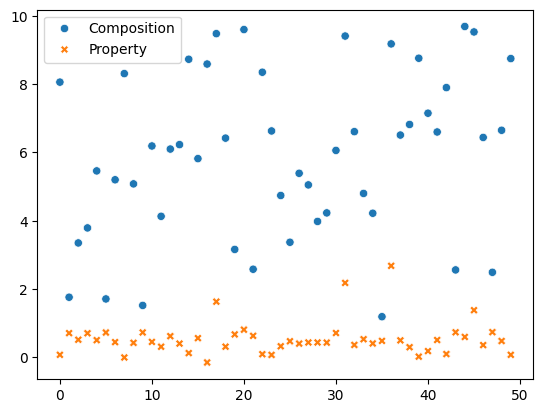

In [6]:
sns.scatterplot(data = df)

<Axes: xlabel='Composition', ylabel='Property'>

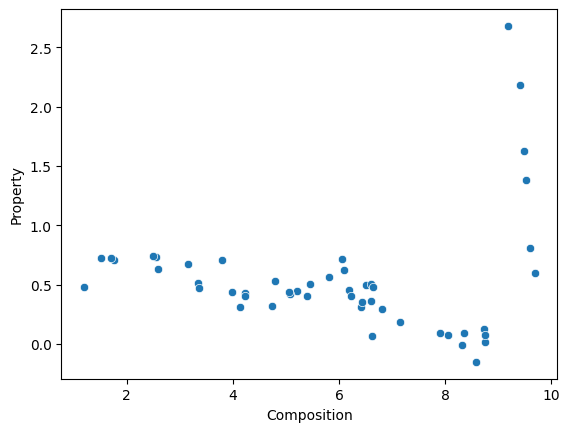

In [7]:
sns.scatterplot(data = df , x ="Composition" , y= "Property")

<Axes: ylabel='Density'>

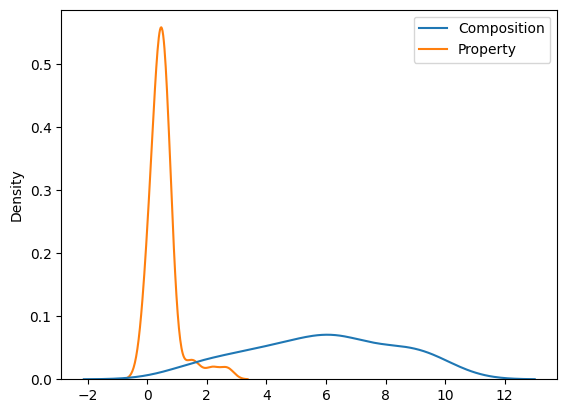

In [8]:
sns.kdeplot(data = df)

<Axes: ylabel='count'>

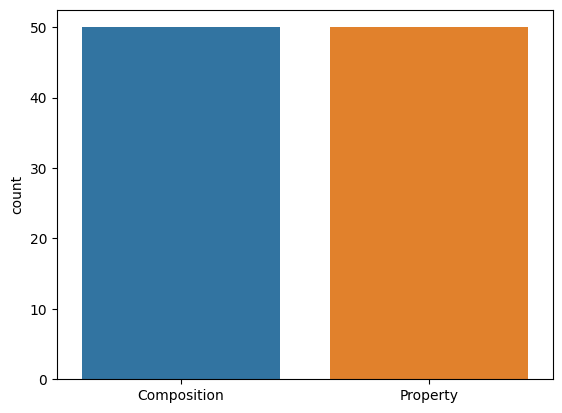

In [9]:
sns.countplot(data = df)

<Axes: >

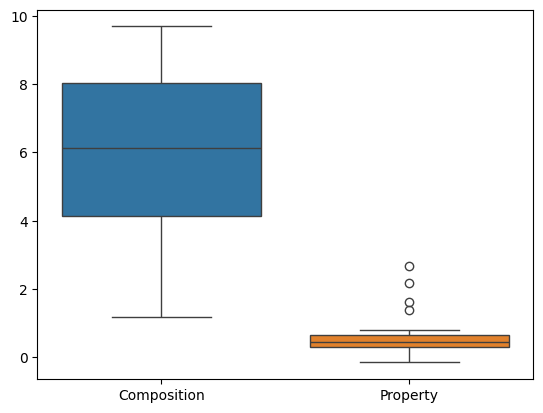

In [10]:
sns.boxplot(data = df)

In [11]:
df.isnull().sum()

Composition    0
Property       0
dtype: int64

In [12]:
X = df.drop(["Property"], axis = 1)
print(X.shape)
X

(50, 1)


Composition
0          8.06
1          1.76
2          3.35
3          3.79
4          5.46
5          1.71
6          5.20
7          8.31
8          5.08
9          1.52
10         6.19
11         4.13
12         6.10
13         6.23
14         8.73
15         5.82
16         8.59
17         9.48
18         6.42
19         3.16
20         9.60
21         2.58
22         8.35
23         6.63
24         4.74
25         3.37
26         5.39
27         5.05
28         3.98
29         4.23
30         6.06
31         9.41
32         6.61
33         4.80
34         4.22
35         1.19
36         9.18
37         6.51
38         6.82
39         8.76
40         7.15
41         6.60
42         7.90
43         2.56
44         9.69
45         9.53
46         6.44
47         2.49
48         6.65
49         8.75

In [13]:
y = df["Property"]
print(y.shape)
y

(50,)


0     0.0742
1     0.7080
2     0.5150
3     0.7060
4     0.5030
5     0.7260
6     0.4450
7    -0.0046
8     0.4240
9     0.7280
10    0.4520
11    0.3110
12    0.6200
13    0.4020
14    0.1240
15    0.5610
16   -0.1510
17    1.6300
18    0.3110
19    0.6710
20    0.8100
21    0.6300
22    0.0917
23    0.0706
24    0.3240
25    0.4700
26    0.4020
27    0.4350
28    0.4350
29    0.4310
30    0.7120
31    2.1800
32    0.3630
33    0.5310
34    0.4060
35    0.4820
36    2.6800
37    0.4970
38    0.2970
39    0.0203
40    0.1820
41    0.5070
42    0.0959
43    0.7340
44    0.5970
45    1.3800
46    0.3580
47    0.7380
48    0.4780
49    0.0737
Name: Property, dtype: float64

In [14]:
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
X_train, X_test ,y_train , y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     train_size=0.8,
                                                     shuffle=True)

In [16]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print("Maximalwert von X_train:", X_train.max())
print("\nMaximalwert von X_test:", X_test.max())

print("Minimalwert von X_train:", X_train.min())
print("\nMinimalwert von X_test:", X_test.min())

print("Maximalwert von y_train:", y_train.max())
print("Minimalwert von y_train:", y_train.min())

print("\nMaximalwert von y_test:", y_test.max())
print("Minimalwert von y_test:", y_test.min())


Maximalwert von X_train: 0.9999999999999999

Maximalwert von X_test: 0.9670588235294119
Minimalwert von X_train: 0.0

Minimalwert von X_test: 0.061176470588235304
Maximalwert von y_train: 46
Minimalwert von y_train: 0

Maximalwert von y_test: 45
Minimalwert von y_test: 4


In [18]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
X_train = T.from_numpy(X_train).float()
X_test = T.from_numpy(X_test).float()
y_train = T.from_numpy(y_train).float()
y_test = T.from_numpy(y_test).float()
y_train = y_train.ravel()

In [20]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_train))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [21]:
X_train

tensor([[0.6424],
        [0.6365],
        [0.1612],
        [0.6176],
        [0.8706],
        [1.0000],
        [0.3059],
        [0.0000],
        [0.9753],
        [0.5882],
        [0.8906],
        [0.8376],
        [0.8082],
        [0.4176],
        [0.5929],
        [0.9894],
        [0.4718],
        [0.3565],
        [0.6153],
        [0.2565],
        [0.6259],
        [0.0388],
        [0.4941],
        [0.6400],
        [0.8871],
        [0.9400],
        [0.5447],
        [0.3282],
        [0.4541],
        [0.7012],
        [0.9812],
        [0.1529],
        [0.3576],
        [0.4576],
        [0.2541],
        [0.3459],
        [0.8424],
        [0.5776],
        [0.7894],
        [0.5024]])

In [22]:
print(X_train.shape)
print(X_train.shape[0])

torch.Size([40, 1])
40


In [23]:
class Predictions(nn.Module):
    
    def __init__(self,input_dims = X_train.shape[1] , hidden_units = 512 , output_dims = X_train.shape[1]):
        super().__init__()
        
        self.activation = nn.LeakyReLU()
        self.droprate = (0.25)
        self.dropout = nn.Dropout(p = self.droprate )
        
        self.ll1 = nn.Linear(in_features=input_dims , out_features = hidden_units)
        self.ll2 = nn.Linear(in_features=hidden_units , out_features = hidden_units)
        
        self.ll3 = nn.Linear(in_features=hidden_units , out_features = hidden_units)
        self.ll4 = nn.Linear(in_features=hidden_units , out_features = hidden_units)
        
        self.ll5 = nn.Linear(in_features=hidden_units , out_features = hidden_units)
        self.ll6 = nn.Linear(in_features=hidden_units , out_features = hidden_units)
        
        self.ll7 = nn.Linear(in_features=hidden_units , out_features = hidden_units)
        self.ll8 = nn.Linear(in_features=hidden_units , out_features = hidden_units)
        
        self.ll9 = nn.Linear(in_features=hidden_units , out_features = hidden_units)
        self.ll10 = nn.Linear(in_features=hidden_units , out_features = output_dims)
        
    def forward(self , X):
        
        X = self.activation(self.ll1(X))
        X = self.activation(self.ll2(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll3(X))
        X = self.activation(self.ll4(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll5(X))
        X = self.activation(self.ll6(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll7(X))
        X = self.activation(self.ll8(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll9(X))
        X = self.activation(self.ll10(X))
        X = self.dropout(X)
        
        return X 
    
    
class training_and_testing():
    
    
    def __init__(self):
        self.epochs = 1000
        self.learn_rate = 1e-4
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.model = Predictions().to(self.device)
        self.loss = nn.MSELoss()
        self.criterion = opt.Adam(self.model.parameters(), lr = self.learn_rate)
        
        self.X_train = X_train
        self.y_train = y_train
        self. X_test = X_test
        self.y_train = y_train
        
    def model_training_and_testing(self):
        
        train_loss ,eval_loss = [] , [] 
        
        for epoch in range(self.epochs):
            
            self.model.train()
            
            forward_pass = self.model(X_train)
            
            train_loss_ = self.loss(forward_pass , y_train)
            train_loss_.backward()
            
            self.criterion.zero_grad()
            
            self.criterion.step()
            
            train_loss.append(train_loss_.item())
            
            self.model.eval()
            
            validation_fp = self.model(X_test)
            
            val_loss = self.loss(validation_fp , y_test)
            
            eval_loss.append(val_loss.item())
            
            print(f"Epoch [{epoch+1}/{self.epochs}], Train Loss: {train_loss_}, Validation Loss: {eval_loss}")
        
        plt.plot(range(1 , self.epochs +1 ) , train_loss , label = "Train_Acc" , c = "cyan")
        plt.plot(range(1 , self.epochs +1 ) , eval_loss , label = "Evaluation_Acc" , c = "blue")
        plt.xlabel("Training")
        plt.ylabel("Evalutaion")
        plt.title("Model Performance")
        plt.legend(loc = (1,0))
        plt.show();
    


g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/1000], Train Loss: 617.15966796875, Validation Loss: [953.2118530273438]
Epoch [2/1000], Train Loss: 617.15966796875, Validation Loss: [953.2118530273438, 953.2118530273438]
Epoch [3/1000], Train Loss: 617.1568603515625, Validation Loss: [953.2118530273438, 953.2118530273438, 953.2118530273438]
Epoch [4/1000], Train Loss: 617.16162109375, Validation Loss: [953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438]
Epoch [5/1000], Train Loss: 617.1572265625, Validation Loss: [953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438]
Epoch [6/1000], Train Loss: 617.159912109375, Validation Loss: [953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438]
Epoch [7/1000], Train Loss: 617.1597290039062, Validation Loss: [953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438, 953.2118530273438]
Epoch [8/1000], Train L

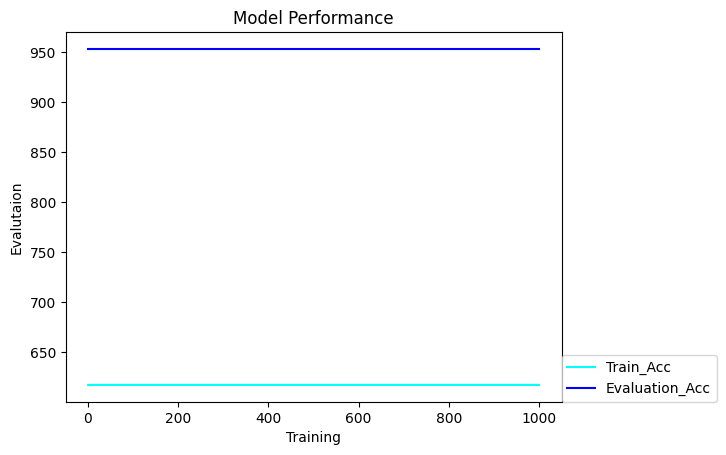

In [24]:
training_and_testing().model_training_and_testing()